<h1><font size = 10><center>Assignment 3</center></font></h1>
<h1><font size = 6><center>Zach Chase</center></font></h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Part 1: Data Exploration. 
Load the titanic dataset fromSeabornby using the load_dataset(‘titanic’) method. Document the columns that aremissing data both numerically (via a count) and visually (via an sns heatmap). Document which values are categorical. Explore the data and answer thefollowing questions: Did more women or men die on the Titanic? Whichpassenger class was more likely to survive? What does the distribution of farelook like? What does the distribution of non-null age values look like? What isthemedian age of each passenger class (pclass)? Visualize this in a box plot.

## Document Missing Data

In [2]:
# Load data using github data, NOT seaborn
# Note this was specifically mentioned in class to do
titanic = pd.read_csv("train.csv")

In [3]:
# Find missing data numerically
print(titanic.isnull().sum(), '\n')

for i in titanic.columns:
    print(i)
    print(set(titanic[i]), '\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 17

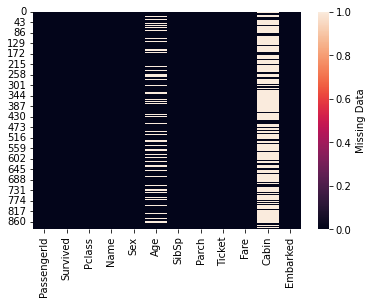

In [4]:
# Find missing data visually
sns.heatmap(titanic.isnull(), cbar_kws={'label': 'Missing Data'})
plt.show()

The columns with missing values are age, embarked, deck, and embark_town.

## Document Categorical Columns

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The categorical columns are Survived, Pclass, Sex, Parch, SibSp, and Embarked.

## Explore Data

In [6]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
pd.pivot_table(titanic,index=['Sex', 'Pclass'],aggfunc={'Survived':np.sum})

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

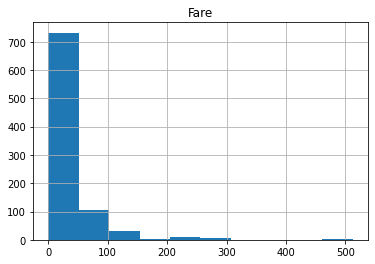

In [10]:
#What does the distribution of fare look like?
titanic.hist('Fare')
plt.show()

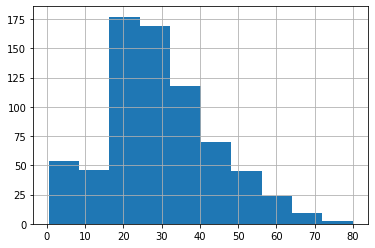

In [11]:
# What does the distribution of non-null age values look like?
titanic['Age'].dropna().hist()
plt.show()

In [12]:
# What is the median age of each passenger class (pclass)?
pd.pivot_table(titanic,index=['Pclass'],aggfunc={'Age':np.median})

,Age
Pclass,
1,37.0
2,29.0
3,24.0


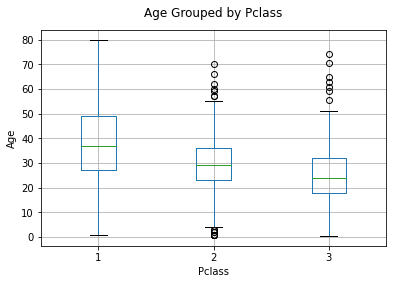

In [13]:
pd.DataFrame(titanic[['Age', 'Pclass']]).boxplot(by='Pclass')
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.suptitle("Age Grouped by Pclass")
plt.title("")
plt.show()

# Part 2: Data Cleansing
Since there are so many missingvaluesin Cabin, get rid of the cabin feature. Define a function to impute age usingthemedian of the passenger class you computed earlier. To call it, use train[[‘age’,
‘pclass]].apply(impute_age,axis=1). Drop the remaining records containingnull
values. Show there are no remaining null values. Convert categorical variablestonumeric dummies using pandas’ get_dummies() method. Add these to your
training dataframe. Drop the categorical columns you converted earlier aswell asname, ticket, and passengerId. Create a feature set by dropping “Survived.” Yourresulting feature set should include pclass, age, sibsp, parch, fare, and thecategorical dummy columns you created earlier. Implement a label dataframebycopying the contents of the Survived column of your training set to a newdataframe. Split your clean data into a training and test set.

## Remove column

In [14]:
## Remove cabin feature
titanic = titanic.drop(['Cabin'], axis = 1)

## Clean Age

In [15]:
def impute_age(data):
    """
    Note that assigned values are found from part 1 pivot table
    """
    
    Age = data[0]
    Pclass = data[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age,axis=1)

## Drop remaining nan observations

In [17]:
titanic = titanic.dropna(axis = 0)
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Convert categorical variables

In [18]:
titanic = pd.get_dummies(titanic, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])
titanic = titanic.drop(['Name', 'Ticket', 'PassengerId'], axis = 1)

## Create Feature Set

In [19]:
y = titanic['Survived']

titanic = titanic.drop(['Survived'], axis = 1)

## Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(titanic, y, test_size=0.33, random_state=42)

## Part 3: Model Training. 
Implement a logistic regressionmodel.
Implement a support vector classifier. Implement an sgd classifier. Print out theclassification reports, confusion matrices, and roc score and chart for eachof
these. Remember to set Probability=True for SVM and use
method=decision_function in a cross_val_predict instead of predict_probafor theSGD ROC plot.

In [21]:
lr = LogisticRegression()
support = svm.SVC(probability=True)
sgd = SGDClassifier()

lr.fit(X_train, y_train)
support.fit(X_train, y_train)
sgd.fit(X_train, y_train)

lr_predict = lr.predict(X_train)
support_predict = support.predict(X_train)
sgd_predict = sgd.predict(X_train)

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(classification_report(y_train, lr_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       365
           1       0.79      0.70      0.74       230

    accuracy                           0.81       595
   macro avg       0.81      0.79      0.80       595
weighted avg       0.81      0.81      0.81       595



In [23]:
print(classification_report(y_train, support_predict))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       365
           1       0.71      0.29      0.41       230

    accuracy                           0.68       595
   macro avg       0.69      0.61      0.60       595
weighted avg       0.69      0.68      0.64       595



In [24]:
print(classification_report(y_train, sgd_predict))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       365
           1       0.64      0.80      0.71       230

    accuracy                           0.75       595
   macro avg       0.74      0.76      0.74       595
weighted avg       0.77      0.75      0.75       595



In [25]:
confusion_matrix(y_train, lr_predict)

array([[321,  44],
       [ 68, 162]])

In [26]:
confusion_matrix(y_train, support_predict)

array([[337,  28],
       [163,  67]])

In [27]:
confusion_matrix(y_train, sgd_predict)

array([[261, 104],
       [ 46, 184]])

In [28]:
roc_auc_score(y_train, lr_predict)

0.7918999404407386

In [29]:
roc_auc_score(y_train, support_predict)

0.6072960095294817

In [30]:
roc_auc_score(y_train, sgd_predict)

0.7575342465753425

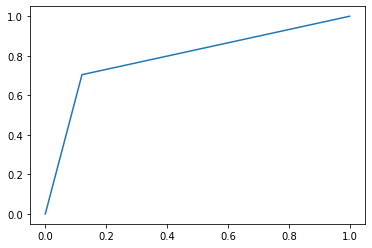

In [31]:
from sklearn import datasets, metrics, model_selection, svm
fpr, tpr, threshold = metrics.roc_curve(y_train, lr_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.show()

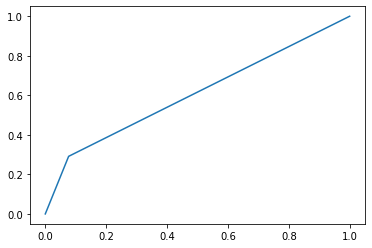

In [32]:
fpr, tpr, threshold = metrics.roc_curve(y_train, support_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

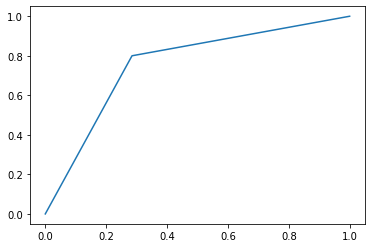

In [33]:
fpr, tpr, threshold = metrics.roc_curve(y_train, sgd_predict)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

## Part 4: Model Tuning
See if scaling your input data affects your SVC model (implement asklearn pipeline to combine scaling and instantiation of your model). Do a grid search of your pipeline classifier using the following parameter
grid: {‘<your_svc_model_name> kernel’: [‘rbf’],
‘<your_svc_model_name> gamma’: [0.0001, 0.001, 0.01, 0.1, 1],
‘{‘<your_svc_model_name> C’: [1,10,50,100,200,300]}.

Print the best estimator, its parameters, and the resulting score. Applythisestimator to your test set
o Implement a learning curve using your best estimator fromthe gridsearch. The figure should have a title of “learning curve.” Label the y-axis with “Score.” Label the x-axis with “Training Examples.” Make the training score red. Make the validation score green. What does this learning curve tell you?

In [34]:
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("svm", svm.SVC())])

param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svm__kernel': ['rbf']
}

grid = GridSearchCV(pipe, param_grid, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

In [35]:
grid.best_params_

{'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [36]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100, gamma=0.01))])

In [37]:
grid.best_score_

0.8235294117647058

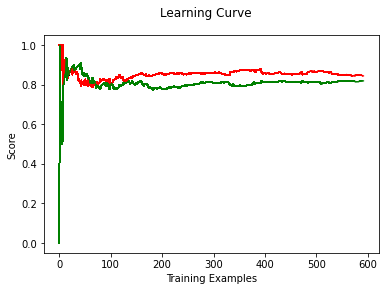

In [38]:
train_errors, val_errors = [], []
for m in range(2, len(X_train)):
    pipe = Pipeline(steps=[("scaler", StandardScaler()), 
                       ("svm", svm.SVC(C= 1000, gamma= 0.001, kernel= 'rbf'))])

    model = pipe.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_test[:m])
    train_errors.append(accuracy_score(y_train[:m], y_train_predict))
    val_errors.append(accuracy_score(y_test[:m],y_val_predict))
    plt.plot(train_errors, "r", linewidth=1, label="train")
    plt.plot(val_errors, "g", linewidth=1, label="val")
    plt.suptitle("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    

This chart above shows that only about 100 samples are needed for about 80% accuracy, where it flattens out.